In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. AirQualityUCI 데이터셋 살펴보기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
air_df = pd.read_csv('/content/drive/MyDrive/4.머신러닝/Data/AirQualityUCI.csv')
air_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


* Date: 측정 날짜
* Time: 측정 시간
* CO(GT): 일산화탄소 농도 (mg/m^3)
* PT08.S1(CO): 일산화탄소에 대한 센서 응답
* NMHC(GT): 비메탄 탄화수소 농도 (microg/m^3)
* C6H6(GT): 벤젠 농도 (microg/m^3)
* PT08.S2(NMHC): 탄화수소에 대한 센서 응답
* NOx(GT): 산화 질소 농도 (ppb)
* PT08.S3(NOx): 산화 질소에 대한 센서 응답
* NO2(GT): 이산화질소 농도 (microg/m^3)
* PT08.S4(NO2): 이산화질소에 대한 센서 응답
* PT08.S5(O3): 오존에 대한 센서 응답
* T: 온도 (°C)
* RH: 상대 습도 (%)
* AH: 절대 습도 (g/m^3)

In [ ]:
air_df.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)

In [ ]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [ ]:
air_df.dropna(inplace=True)

In [ ]:
air_df['Date'] = pd.to_datetime(air_df.Date, format = '%d-%m-%Y')
air_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
air_df['Month'] = air_df['Date'].dt.month
air_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3


In [ ]:
air_df['Hour'] = air_df.Time.str.split(':').str[0].fillna(0).astype(int)
air_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Hour
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,18
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,19
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,20
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,21
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,22


In [ ]:
air_df.drop(['Date','Time'],axis=1,inplace=True)

In [ ]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
 13  Month          9357 non-null   int64  
 14  Hour           9357 non-null   int64  
dtypes: float64(13), int64(2)
memory usage: 1.1 MB


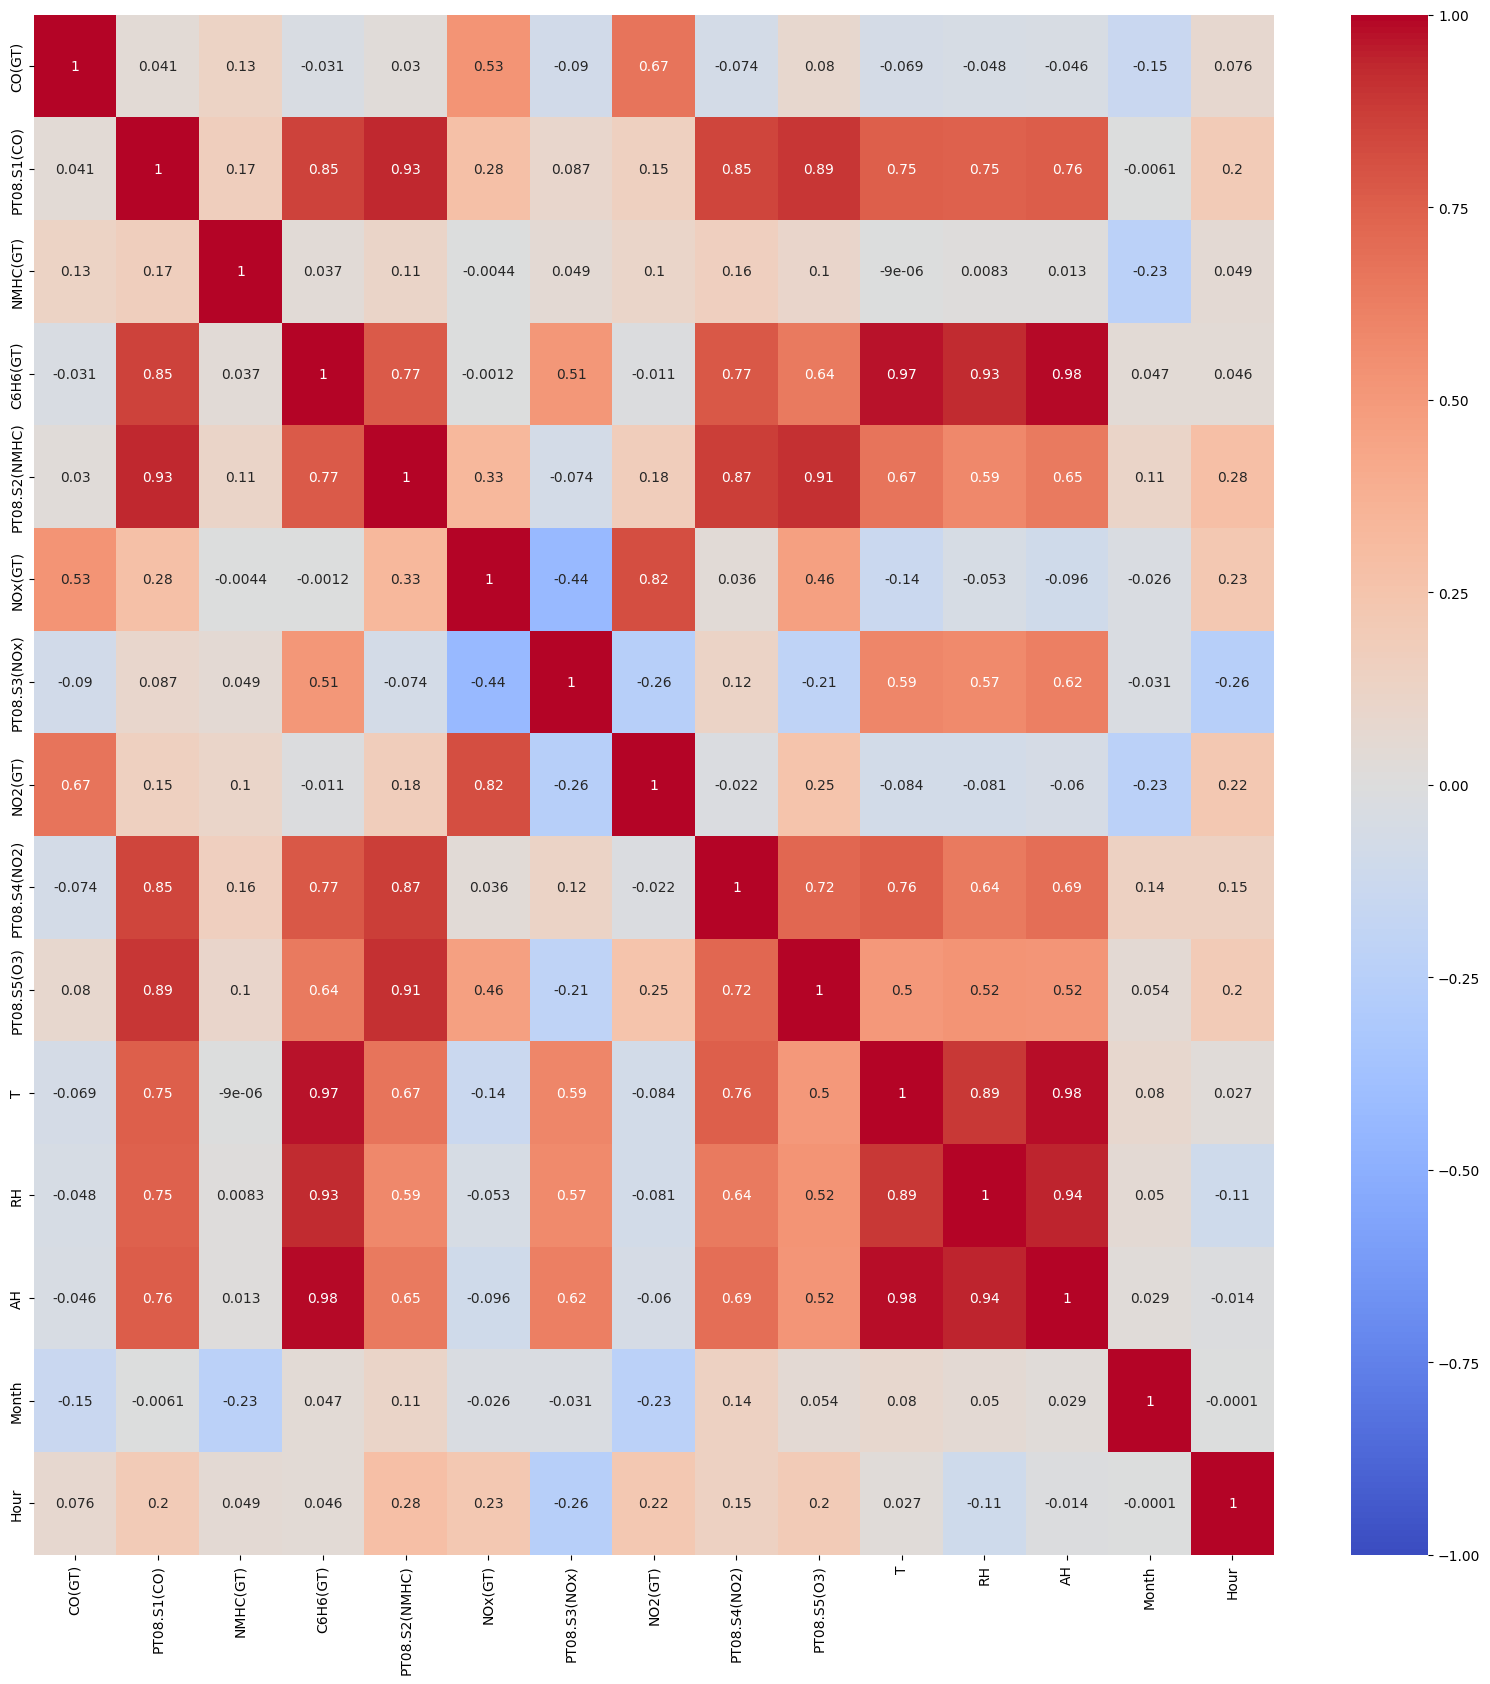

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(air_df.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
ss = StandardScaler()

In [ ]:
X = air_df.drop('RH',1)
y = air_df['RH']

Xss = ss.fit_transform(X)
Xss
# 이렇게 종속 변수 독립 변수 나눠서 아니면 한 번에 넣어서 스케일링 하는 것도 있다.

<ipython-input-17-d8030c4ba9b0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = air_df.drop('RH',1)


array([[ 0.4739999 ,  0.94298276,  2.21123554, ...,  0.19488093,
        -0.96287933,  0.93913327],
       [ 0.46627322,  0.73680662,  1.93938293, ...,  0.19405218,
        -0.96287933,  1.08358325],
       [ 0.46884878,  1.07032685,  1.76768654, ...,  0.19468593,
        -0.96287933,  1.22803323],
       ...,
       [ 0.47142434,  0.28200632, -0.29267014, ...,  0.19187384,
        -0.6720105 ,  0.0724334 ],
       [ 0.467561  , -0.13944196, -0.29267014, ...,  0.188623  ,
        -0.6720105 ,  0.21688338],
       [ 0.46884878,  0.06673418, -0.29267014, ...,  0.1883382 ,
        -0.6720105 ,  0.36133336]])

In [ ]:
y

0       48.9
1       47.7
2       54.0
3       60.0
4       59.6
        ... 
9352    29.3
9353    23.7
9354    18.3
9355    13.5
9356    13.1
Name: RH, Length: 9357, dtype: float64

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(Xss,y,test_size=0.2, random_state=2023)

In [ ]:
X_train.shape, y_train.shape

((7485, 14), (7485,))

In [ ]:
X_test.shape, y_test.shape

((1872, 14), (1872,))

# 2. 모델별 성능 확인을 위함 함수


In [ ]:
my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

def plot_predictions(name_, pred, actual):
  df = pd.DataFrame({'prediction': pred, 'actual': y_test})
  df = df.sort_values(by='actual').reset_index(drop=True)

  plt.figure(figsize=(12, 9))
  plt.scatter(df.index, df['prediction'], marker='x', color='r')
  plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
  plt.title(name_, fontsize=15)
  plt.legend(['prediction', 'actual'], fontsize=12)
  plt.show()

def mse_eval(name_, pred, actual):
  global my_predictions
  global colors

  plot_predictions(name_, pred, actual)

  mse = mean_squared_error(pred, actual)
  my_predictions[name_] = mse

  y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

  df = pd.DataFrame(y_value, columns=['model', 'mse'])
  print(df)

  min_ = df['mse'].min() - 10
  max_ = df['mse'].max() + 10

  length = len(df)

  plt.figure(figsize=(10, length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'], fontsize=15)
  bars = ax.barh(np.arange(len(df)), df['mse'])

  for i, v in enumerate(df['mse']):
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

  plt.title('MSE Error', fontsize=18)
  plt.xlim(min_, max_)

  plt.show()

3. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predicition1 = model.predict(X_test)
predicition1

array([39.12195944, 54.8191515 , 21.54308575, ..., 67.97062354,
       58.11464719, 60.62614308])

In [ ]:
rs1 = np.sqrt(mean_squared_error(y_test,predicition1))
print(rs1)

7.3316009912232705


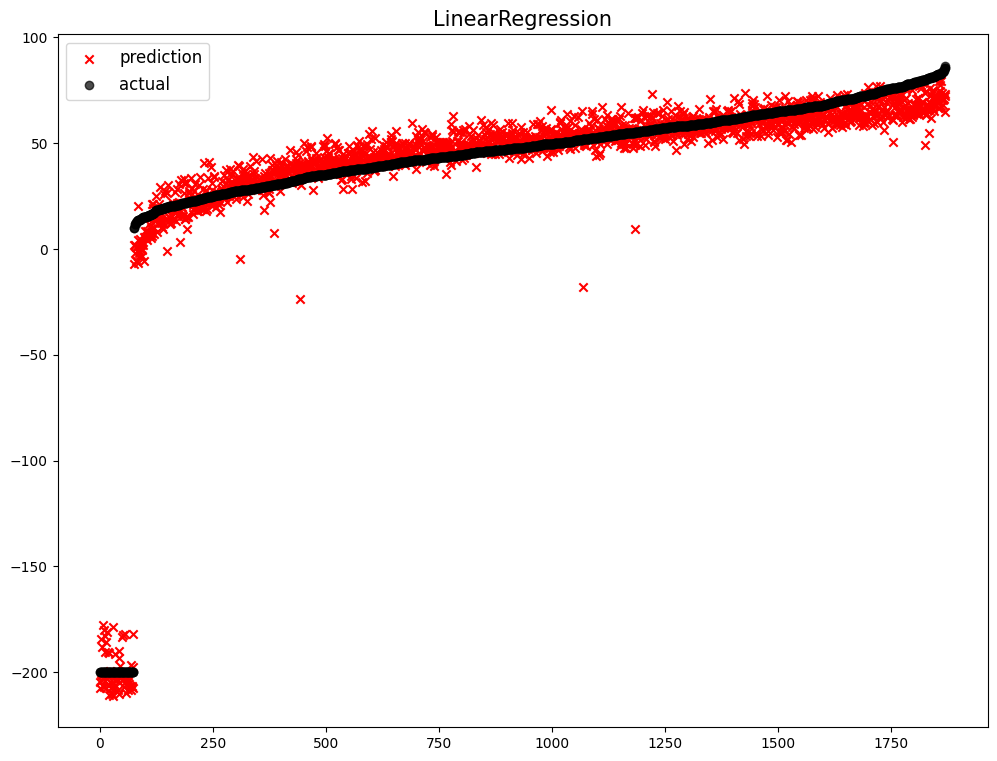

              model        mse
0  LinearRegression  53.752373


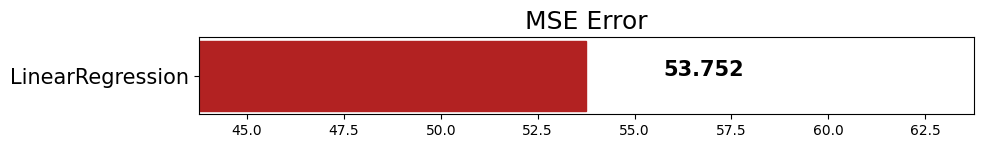

In [ ]:
mse_eval('LinearRegression',predicition1, y_test)

# 4.Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model2 = DecisionTreeRegressor()

In [ ]:
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
prediction2 = model2.predict(X_test)
prediction2

array([36.7, 52. , 19.8, ..., 74.5, 59.8, 66.2])

In [ ]:
rs2 = np.sqrt(mean_squared_error(y_test,prediction2))
print(rs2)

1.1769510079921233


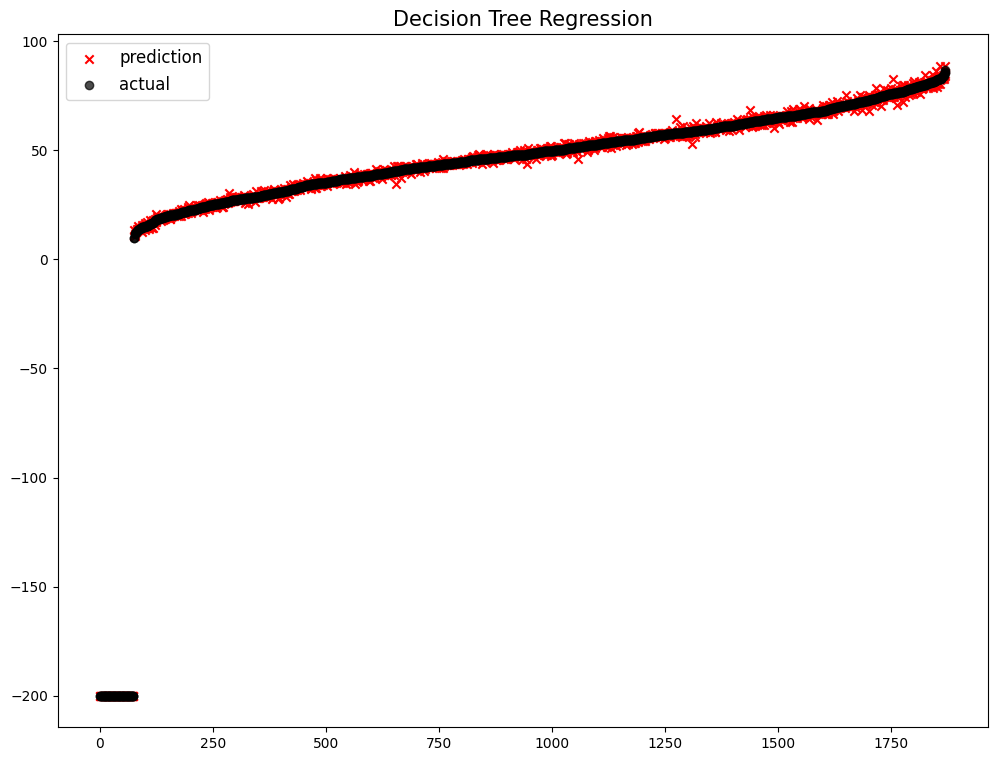

                      model        mse
0          LinearRegression  53.752373
1  Decision Tree Regression   1.385214


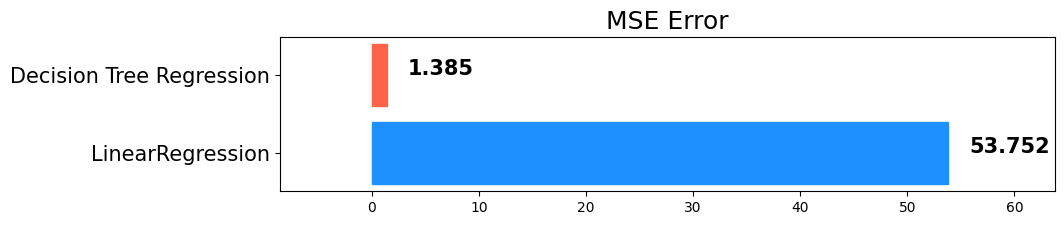

In [ ]:
mse_eval('Decision Tree Regression', prediction2, y_test)

# 5. Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model3 = RandomForestRegressor()

In [ ]:
model3.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
prediction3 = model3.predict(X_test)
prediction3

array([38.338, 53.164, 21.525, ..., 77.475, 59.748, 66.9  ])

In [ ]:
rs3 = np.sqrt(mean_squared_error(y_test, prediction3))
print(rs3)

0.5983028655373928


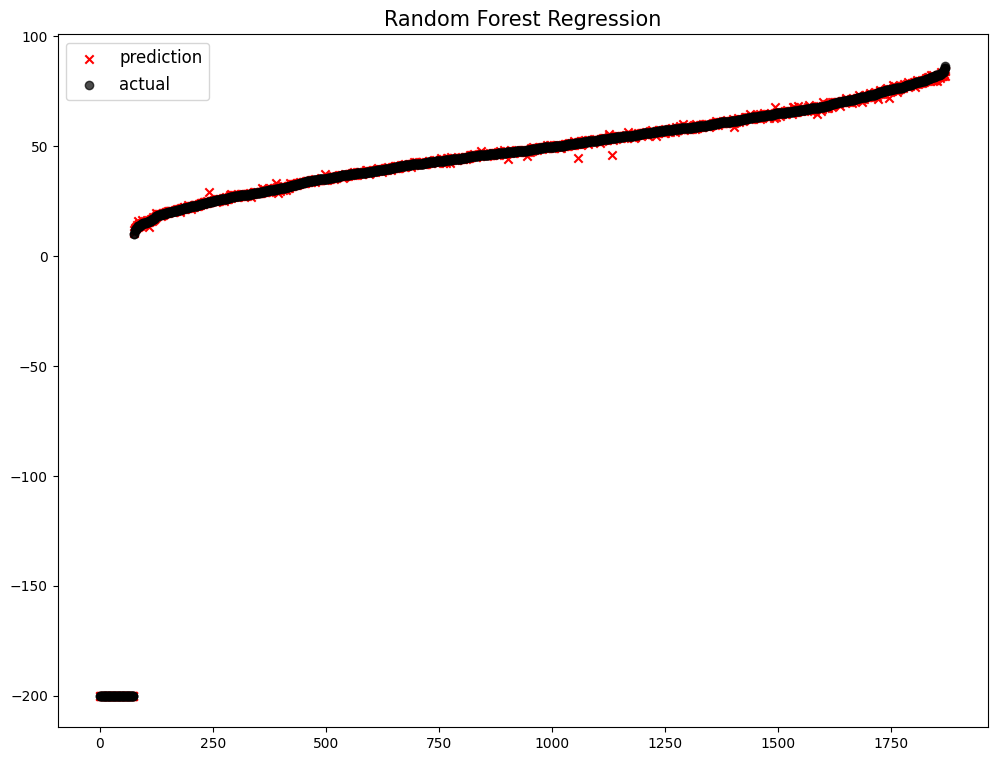

                      model        mse
0          LinearRegression  53.752373
1  Decision Tree Regression   1.385214
2  Random Forest Regression   0.357966


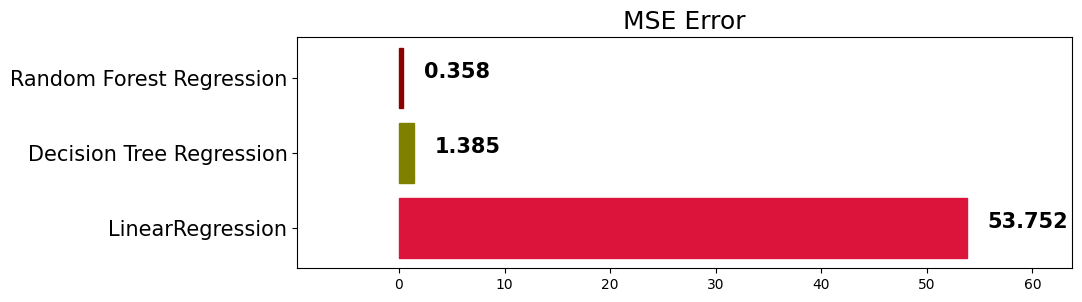

In [ ]:
mse_eval('Random Forest Regression', prediction3, y_test)

6. 서포트 백터 머신

In [ ]:
from sklearn.svm import SVR
# SVC는 분류
# SVR은 회귀

In [ ]:
model4 = SVR()

In [ ]:
model4.fit(X_train,y_train)

SVR()

In [ ]:
prediction4 = model4.predict(X_test)
prediction4

array([45.4213684 , 48.7679407 , 28.23984824, ..., 63.62551055,
       58.05390028, 54.84999548])

In [ ]:
rs4 = np.sqrt(mean_squared_error(y_test, prediction4))
print(rs4)

19.462400854771953


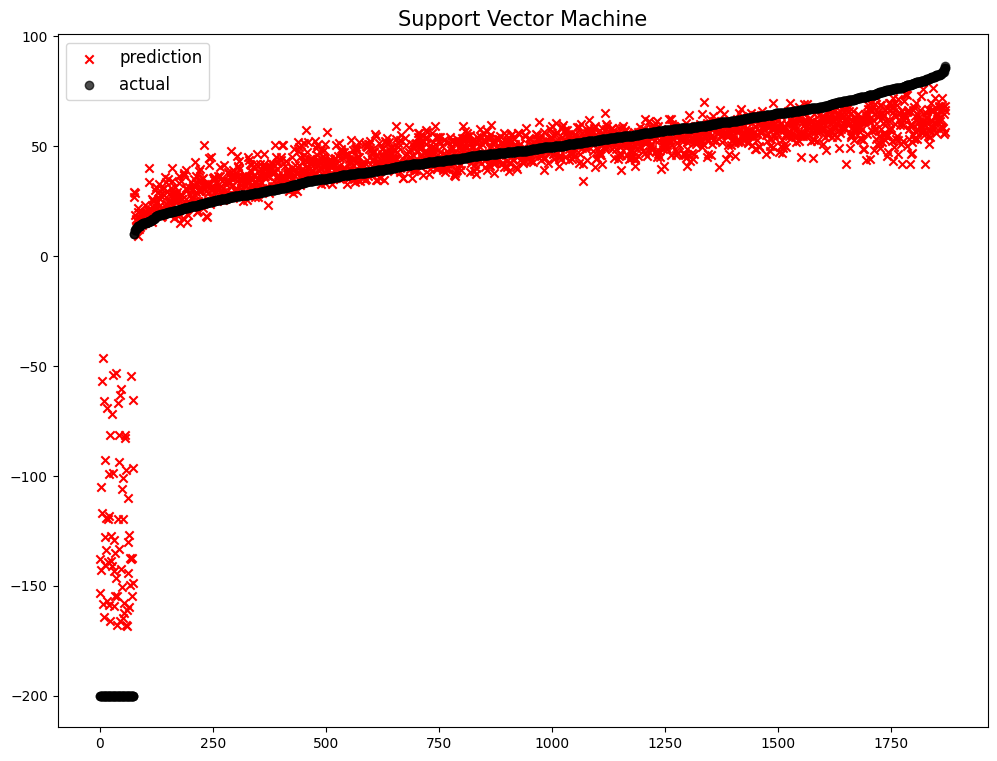

                      model         mse
0    Support Vector Machine  378.785047
1          LinearRegression   53.752373
2  Decision Tree Regression    1.385214
3  Random Forest Regression    0.357966


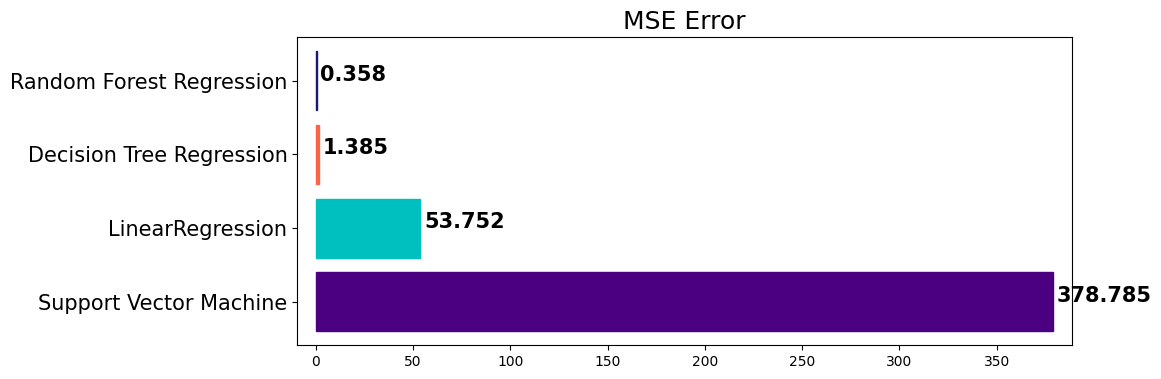

In [ ]:
mse_eval('Support Vector Machine', prediction4, y_test)

# 7. 라이트GBM

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
model5 = LGBMRegressor(random_state=2023)

In [ ]:
model5.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2918
[LightGBM] [Info] Number of data points in the train set: 7485, number of used features: 14
[LightGBM] [Info] Start training from score 39.596406


LGBMRegressor(random_state=2023)

In [ ]:
prediction5 = model5.predict(X_test)
prediction5

array([38.15923914, 54.6923707 , 20.92444565, ..., 77.37057223,
       60.51182966, 65.99590754])

In [ ]:
rs5 = np.sqrt(mean_squared_error(y_test, prediction5))
print(rs5)

0.7736864001011999


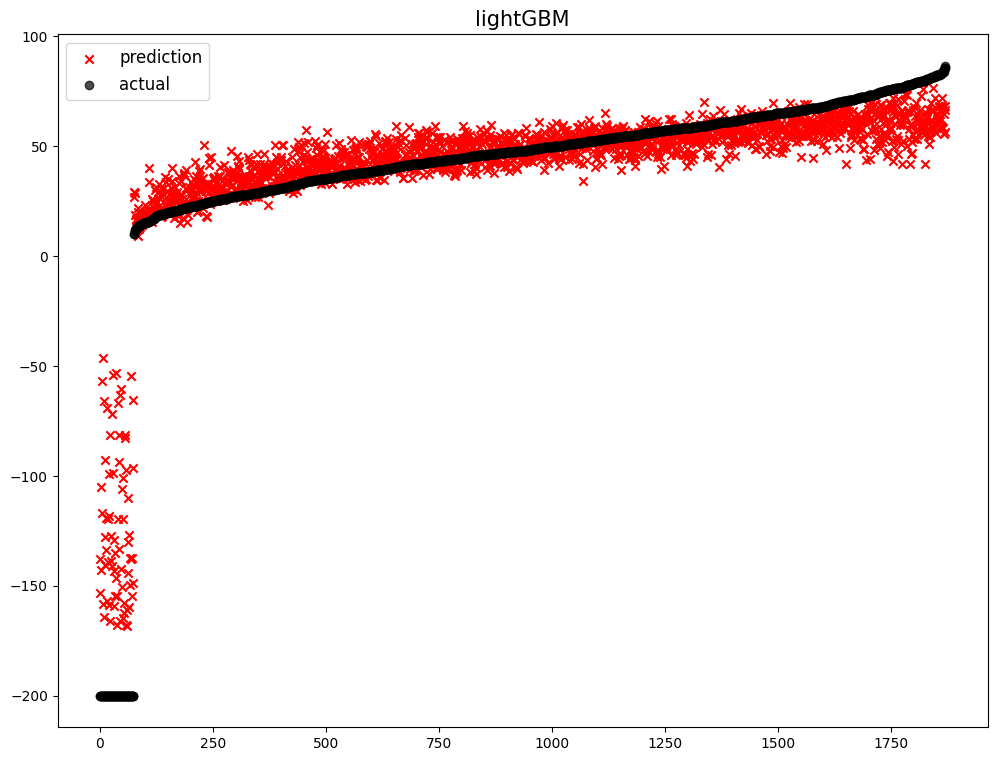

                      model         mse
0    Support Vector Machine  378.785047
1                  lightGBM  378.785047
2          LinearRegression   53.752373
3  Decision Tree Regression    1.385214
4  Random Forest Regression    0.357966


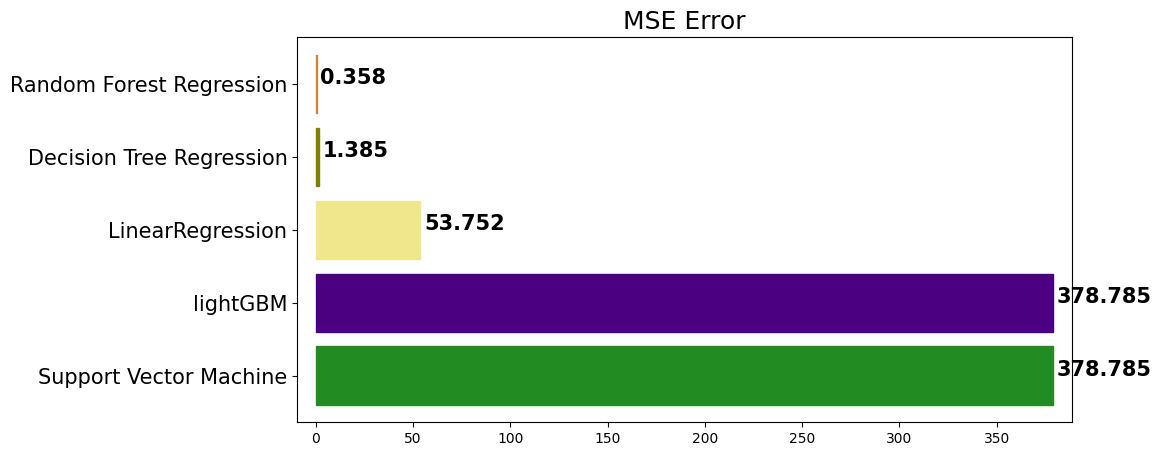

In [ ]:
mse_eval('lightGBM', prediction4, y_test)

In [ ]:
dict = {'Linear Regression':rs1,
        'Decision Tree Regression':rs2,
        'Random Forest Regrssion':rs3,
        'Support Vector Machine':rs4,
        'lightGBM':rs5}


res = [key for key in dict if all(dict[temp] >= dict[key] for temp in dict)]

min = {k:dict[k] for k in dict.keys() & set(res)}

print(min)

{'Random Forest Regrssion': 0.5983028655373928}


```

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train and evaluate the models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    results[name] = mse

results

```